See https://github.com/zalandoresearch/fashion-mnist for more details

In [0]:
#This code uses MNIST example found in keras.io
from __future__ import print_function
import keras
from keras.datasets import  fashion_mnist
from keras.models import  Sequential
from keras.layers import  Dense, Dropout, Flatten
from keras.layers import  Conv2D, MaxPool2D
from keras import  backend as K
import matplotlib.pyplot as plt

In [0]:
#Supress Warning and Informational messages
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

In [0]:
#Number of classes 
num_classes = 10

In [0]:
#Size of batch and # of epochs
batch_size = 128
epochs = 24

In [0]:
#input image dimensions
img_rows, img_cols = 28, 28

In [0]:
# Import data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

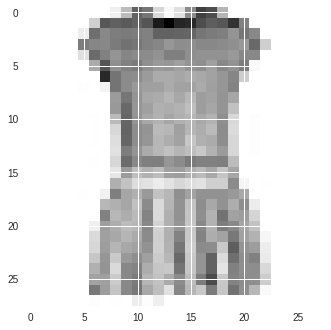

In [17]:
#Look at data
plt.imshow(x_train[3])

In [18]:
y_train[3]

3

In [0]:
# Deal with format issues between different backends.
if K.image_data_format == "channel_first":
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  

In [0]:
# Type Convert and Sca;e the train & test data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
#convert class vectors to binary class matrices. One Hot encoding
# 3 => 0 0 0 1 0 0 0 0 0 0 and 1=> 0 1 0 0 0 0 0 0 0 0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# Define the model
model = Sequential()

In [0]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape))

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(128,activation="relu"))

In [0]:
model.add(Dropout(0.5))

In [0]:
model.add(Dense(num_classes, activation='softmax'))

In [0]:
# Compile the model
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics= ['accuracy'])

In [49]:
#Train the model and test/validate of test data after each cycle

hist = model.fit(x_train, y_train, batch_size =  batch_size, epochs= epochs, verbose=1, validation_data= (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 8s 132us/step - loss: 0.6817 - acc: 0.7518 - val_loss: 0.4691 - val_acc: 0.8233
Epoch 2/24
60000/60000 [==============================] - 8s 126us/step - loss: 0.4384 - acc: 0.8440 - val_loss: 0.3728 - val_acc: 0.8634
Epoch 3/24
60000/60000 [==============================] - 8s 134us/step - loss: 0.3761 - acc: 0.8638 - val_loss: 0.3454 - val_acc: 0.8748
Epoch 4/24
60000/60000 [==============================] - 8s 132us/step - loss: 0.3410 - acc: 0.8769 - val_loss: 0.3190 - val_acc: 0.8863
Epoch 5/24
60000/60000 [==============================] - 8s 128us/step - loss: 0.3190 - acc: 0.8842 - val_loss: 0.3006 - val_acc: 0.8893
Epoch 6/24
60000/60000 [==============================] - 8s 131us/step - loss: 0.2979 - acc: 0.8926 - val_loss: 0.2850 - val_acc: 0.8966
Epoch 7/24
60000/60000 [==============================] - 8s 130us/step - loss: 0.2817 - acc: 0.8957 - val_loss: 0.2994 - 

In [50]:
# Evaluate Model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.2589525735259056
Test Accuracy: 0.9154


In [0]:
#Relationship between training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


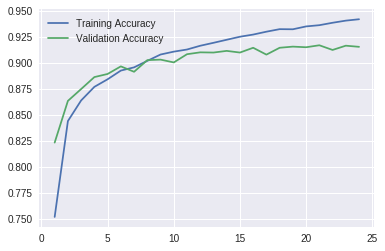

In [52]:
epoch_list = list(range(1, len(hist.history['acc']) + 1 ))
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(("Training Accuracy","Validation Accuracy"))
plt.show()